# Jegyzőkönyv 1


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. feladat

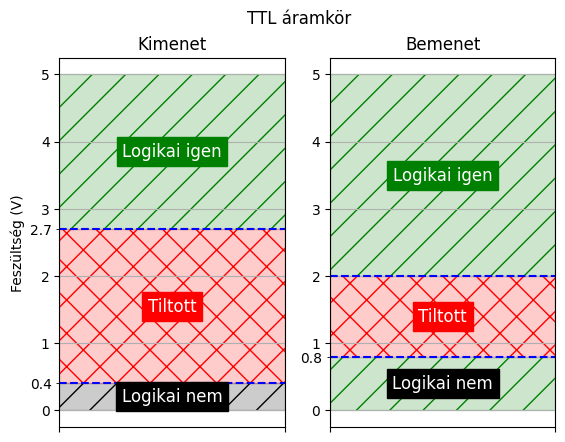

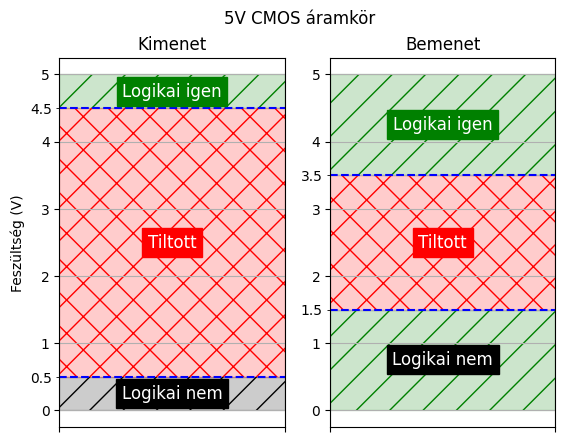

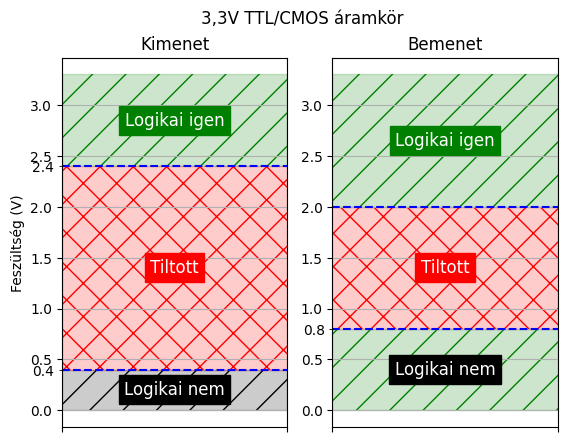

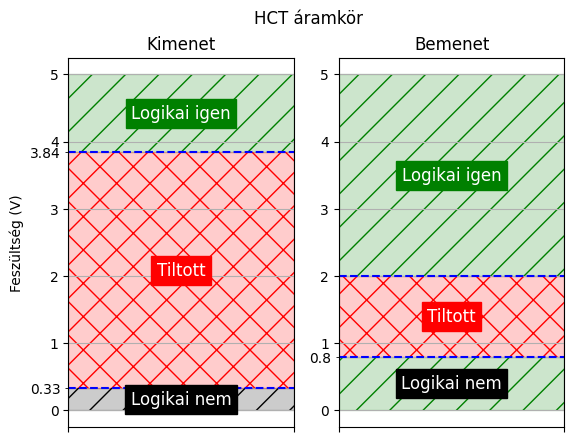

In [240]:
def logic_plot_generator(inp_false_cutoff, inp_true_cutoff, inp_label, out_false_cutoff, out_true_cutoff, out_label, title, volt_min = 0, volt_max = 5) -> None:
    TRUE_VAL = 1
    FALSE_VAL = 0

    fig = plt.figure()
    fig.suptitle(title)
    ax1 = plt.subplot(122)
    
    ax1.set_title('Bemenet')
    plt.yticks(np.arange(volt_min, volt_max, 0.5), minor=True)
    plt.axhline(y=inp_false_cutoff, color='blue', linestyle='--', label=f'{inp_false_cutoff}V')
    plt.axhline(y=inp_true_cutoff, color='blue', linestyle='--', label=f'{inp_true_cutoff}V')
    ax1.set_yticks([inp_false_cutoff, inp_true_cutoff], [f'{inp_false_cutoff}', f'{inp_true_cutoff}'], minor=True)
    
    plt.axhspan(volt_max, inp_true_cutoff, color='green', alpha=0.2, label='Igaz tartomány')
    plt.axhspan(volt_max, inp_true_cutoff, color='green', fill=None, linewidth=0, hatch="/", alpha=1)
    plt.text(0.5, ((volt_max - inp_true_cutoff) / 2) + inp_true_cutoff, 'Logikai igen', fontsize=12, ha='center', va='center', color='white', backgroundcolor='green')

    plt.axhspan(inp_false_cutoff, inp_true_cutoff, color='red', alpha=0.2, label='Tiltott tartomány')
    plt.axhspan(inp_false_cutoff, inp_true_cutoff, color='red', fill=None, linewidth=0, hatch="X", alpha=1)
    plt.text(0.5, ((inp_true_cutoff - inp_false_cutoff) / 2) + inp_false_cutoff, 'Tiltott', fontsize=12, ha='center', va='center', color='white', backgroundcolor='red')
    
    plt.axhspan(inp_false_cutoff, volt_min, color='green', alpha=0.2, label='Hamis tartomány')
    plt.axhspan(inp_false_cutoff, volt_min, color='green', fill=None, linewidth=0, hatch="/", alpha=1)
    plt.text(0.5, ((volt_min - inp_false_cutoff) / 2) + inp_false_cutoff, 'Logikai nem', fontsize=12, ha='center', va='center', color='white', backgroundcolor='black')

    plt.tick_params(axis='x', labelbottom=False)
    plt.xticks([FALSE_VAL, TRUE_VAL], ['0', '1'])
    plt.grid(True, which='both')

    ax2 = plt.subplot(121, sharex=ax1)
    ax2.title.set_text('Kimenet')
    plt.axhline(y=out_false_cutoff, color='blue', linestyle='--', label=f'{out_false_cutoff}V')
    plt.axhline(y=out_true_cutoff, color='blue', linestyle='--', label=f'{out_true_cutoff}V')
    ax2.set_yticks([out_false_cutoff, out_true_cutoff], [f'{out_false_cutoff}', f'{out_true_cutoff}'], minor=True)
    
    plt.axhspan(volt_max, out_true_cutoff, color='green', alpha=0.2, label='Igaz tartomány')
    plt.axhspan(volt_max, out_true_cutoff, color='green', fill=None, linewidth=0, hatch="/", alpha=1)
    plt.text(0.5, ((volt_max - out_true_cutoff) / 2) + out_true_cutoff, 'Logikai igen', fontsize=12, ha='center', va='center', color='white', backgroundcolor='green')

    plt.axhspan(out_false_cutoff, out_true_cutoff, color='red', alpha=0.2, label='Tiltott tartomány')
    plt.axhspan(out_false_cutoff, out_true_cutoff, color='red', fill=None, linewidth=0, hatch="X", alpha=1)
    plt.text(0.5, ((out_true_cutoff - out_false_cutoff) / 2) + out_false_cutoff, 'Tiltott', fontsize=12, ha='center', va='center', color='white', backgroundcolor='red')

    plt.axhspan(out_false_cutoff, volt_min, color='black', alpha=0.2, label='Hamis tartomány')
    plt.axhspan(out_false_cutoff, volt_min, color='black', fill=None, linewidth=0, hatch="/", alpha=1)
    plt.text(0.5, ((volt_min - out_false_cutoff) / 2) + out_false_cutoff, 'Logikai nem', fontsize=12, ha='center', va='center', color='white', backgroundcolor='black')

    plt.tick_params(axis='x', labelbottom=False)
    plt.ylabel('Feszültség (V)')
    plt.grid(True)
    plt.show()

logic_plot_generator(0.8, 2.0, 'Bemenet', 0.4, 2.7, 'Kimenet', 'TTL áramkör')
logic_plot_generator(1.5, 3.5, 'Bemenet', 0.5, 4.5, 'Kimenet', '5V CMOS áramkör')
logic_plot_generator(0.8, 2.0, 'Bemenet', 0.4, 2.4, 'Kimenet', '3,3V TTL/CMOS áramkör', 0, 3.3)
logic_plot_generator(0.8, 2.0, 'Bemenet', 0.33, 3.84, 'Kimenet', 'HCT áramkör')

## 2. feladat

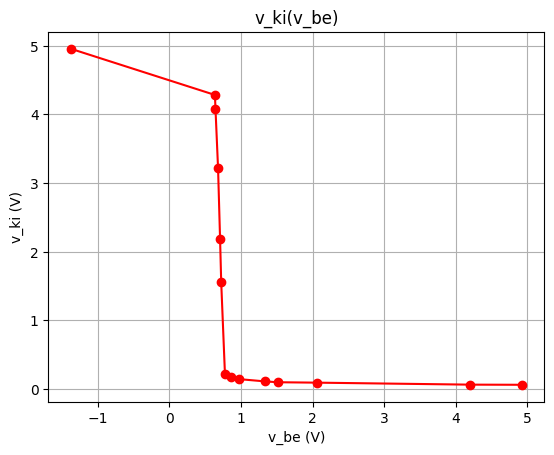

In [148]:
v_be = pd.array([
        4.922, #0
        4.2, #1k
        2.061, #10k
        1.517, #20k
        1.34, #30k
        0.978, # 66k
        0.855, # 120k
        0.777, # 240k
        0.725, # 500k
        0.709, #620k
        0.681, # 1m
        0.645, # 2m
        0.637, # 2.5m
        -1.375 # 3m
])

v_ki = pd.array([
        0.063, #0
        0.065, #1k
        0.094, #10k
        0.1, #20k
        0.112, #30k
        0.145, #66k
        0.174, #120k
        0.224, #240k
        1.553, #500k
        2.188, #620k
        3.212, #1m
        4.081, #2m
        4.283, #2.5m
        4.955, #3m
])

# plot v_ki by v_be
plt.plot(v_be, v_ki, 'ro-')
plt.title('v_ki(v_be)')
plt.xlabel('v_be (V)')
plt.ylabel('v_ki (V)')
plt.grid()
plt.show()

## 3. feladat

In [149]:
v_be = pd.array([
    0.212,
    4.851,
])

v_ki = pd.array([
    4.185,
    0.148,
])

r_be = pd.array([
    1000,
])

i_be = pd.array([
    
]) / r_be